<a href="https://colab.research.google.com/github/sathvikb007/Image-Clustering-with-Autoencoders/blob/branch1/3_convolutionalAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Convolutional Autoencoder***



![](https://miro.medium.com/max/3636/1*LSYNW5m3TN7xRX61BZhoZA.png)

The model below emulates a convolutional autoencoder. The encoder consists of convolutions of filters 3 x 3, then max-pooling of 2 x 2. The encoded representation is a 16 x 16 image.

In [1]:
#Importing the required libraries

from keras.callbacks import Callback
from keras.layers import *
from keras.models import Model, Sequential
from keras.datasets import mnist
from keras import regularizers
from keras import optimizers
from keras.optimizers import RMSprop
from keras import backend as K
import scipy
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
import pandas as pd
import numpy as np
import tensorflow as tf


Using TensorFlow backend.


In [2]:
#Loading the fashion MNIST dataset

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
#Normalizing the data

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [4]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
#autoencoder model

input_img = Input(shape=(28, 28, 1))  

x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 16) dimensional

x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [6]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [7]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0   

In [0]:
#encoder model

encoder = Model(input_img, encoded)

In [9]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0   

In [10]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

history = LossHistory()

autoencoder.fit(x_train, x_train,
                epochs=80,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks = [history])



Train on 60000 samples, validate on 10000 samples
Epoch 1/80
60000/60000 [==============================] - 14s 237us/step - loss: 0.0388 - val_loss: 0.0263
Epoch 2/80
60000/60000 [==============================] - 6s 98us/step - loss: 0.0234 - val_loss: 0.0210
Epoch 3/80
60000/60000 [==============================] - 6s 100us/step - loss: 0.0196 - val_loss: 0.0185
Epoch 4/80
60000/60000 [==============================] - 6s 100us/step - loss: 0.0175 - val_loss: 0.0182
Epoch 5/80
60000/60000 [==============================] - 6s 99us/step - loss: 0.0160 - val_loss: 0.0171
Epoch 6/80
60000/60000 [==============================] - 6s 99us/step - loss: 0.0153 - val_loss: 0.0148
Epoch 7/80
60000/60000 [==============================] - 6s 100us/step - loss: 0.0146 - val_loss: 0.0142
Epoch 8/80
60000/60000 [==============================] - 6s 100us/step - loss: 0.0141 - val_loss: 0.0146
Epoch 9/80
60000/60000 [==============================] - 6s 100us/step - loss: 0.0137 - val_loss: 0.0

Among all the autoencoders, the convolutional autoencoder has the least reconstruction loss

Text(0, 0.5, 'mean squared error')

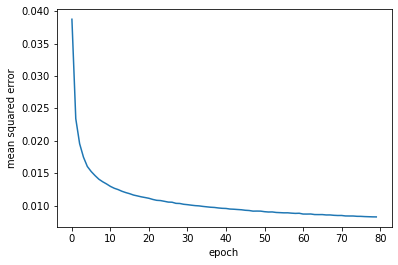

In [11]:
#To plot loss vs epoch

plt.plot(list(range(len(history.losses))), history.losses)
plt.xlabel('epoch')
plt.ylabel('mean squared error')

In [0]:
CAE_encoded_imgs_train = encoder.predict(x_train)
CAE_decoded_imgs_train = autoencoder.predict(x_train)

CAE_encoded_imgs_test = encoder.predict(x_test)
CAE_decoded_imgs_test = autoencoder.predict(x_test)

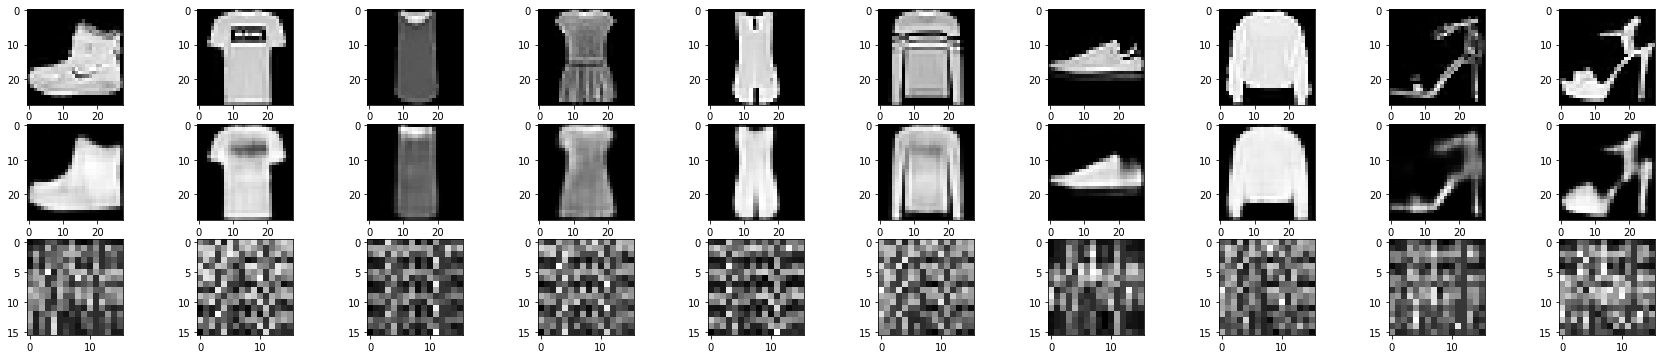

In [13]:
n = 10  
plt.figure(figsize=(30,6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.gray()
    plt.imshow(x_train[i].reshape(28, 28))
    
    

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(CAE_decoded_imgs_train[i].reshape(28, 28))

    #display latent representation
    ax = plt.subplot(3, n, i+1+ n*2)
    plt.imshow(CAE_encoded_imgs_train[i].reshape(16,16))
   
plt.show()

In [0]:
CAE_encoded_imgs_train = CAE_encoded_imgs_train.reshape(60000,256)
CAE_encoded_imgs_test = CAE_encoded_imgs_test.reshape(10000,256)

In [15]:
print(CAE_encoded_imgs_train.shape)
print(CAE_encoded_imgs_test.shape)

(60000, 256)
(10000, 256)


In [0]:
#To standardize the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(CAE_encoded_imgs_train)
X_test  = sc.transform(CAE_encoded_imgs_test)

In [0]:
#Clustering the data into 10 classes with the encoded data

from sklearn.cluster import KMeans
CAEkmeans = KMeans(n_clusters=10, random_state=0).fit(X_train)

In [0]:
yPredtrain = CAEkmeans.predict(X_train)
yPredtest = CAEkmeans.predict(X_test)

In [31]:
from sklearn import metrics
print(metrics.adjusted_rand_score(y_train.reshape(60000,).tolist(), yPredtrain.tolist()))
print(metrics.adjusted_rand_score(y_test.reshape(10000,).tolist(), yPredtest.tolist()))

0.36916842373039166
0.3655434775066856


In [33]:
print(metrics.normalized_mutual_info_score(y_train, yPredtrain))
print(metrics.normalized_mutual_info_score(y_test, yPredtest))

0.5601708814388936
0.5582457077064659


We can see that clustering with the convolutional encoded data gives the best results. It has learned the useful features of the images, better than the deep or simple autoencoder did.